<a href="https://colab.research.google.com/github/lucasrabd/WellDoneABX/blob/main/Analise_1_ABX_Welldone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Análise de Dados para ABX Tecnologia: Google Colab Notebook**

#Introdução

Neste notebook Colab, vamos realizar uma análise descritiva dos dados do dataset solicitacoescredito.csv, focando na identificação de padrões e tendências relacionadas à inadimplência dos clientes da ABX Tecnologia. A análise será realizada em etapas, desde a importação e pré-processamento dos dados até a visualização e interpretação dos resultados.

####Importando bibliotecas necessárias para o funcionamento do código.

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
import joblib

#### Carregando os dados.



In [5]:
try:
    df = pd.read_csv('/content/solicitacoescredito3.csv', delimiter=';')
    print("Arquivo CSV lido com sucesso")
except FileNotFoundError:
    print("Arquivo não encontrado. Por favor, verifique o caminho do arquivo.")
except pd.errors.ParserError as e:
    print("Erro ao ler o arquivo CSV:", e)


Arquivo CSV lido com sucesso


### Verificando o número de linhas e colunas

- dados.shape retorna uma tupla com o número de linhas e colunas do DataFrame dados.

- print("Número de linhas e colunas:", dados.shape) exibe o número de linhas e colunas na saída.

Este passo permite que tenhamos uma compreensão inicial do tamanho do conjunto de dados, ou seja, quantas observações (linhas) e variáveis (colunas) estão presentes. Isso nos ajuda a entender a escala dos dados com os quais estamos tomando conta.

In [8]:
print("Número de linhas e colunas:", df.shape)

Número de linhas e colunas: (8973, 38)


#### Verificando as informações sobre as colunas

- dados.info() fornece um resumo conciso do DataFrame, incluindo o número de entradas não nulas em cada coluna e os tipos de dados de cada coluna.

A função info() fornece um resumo do DataFrame, incluindo informações importantes como o número de entradas não nulas em cada coluna e os tipos de dados de cada coluna. Isso nos ajuda a identificar quaisquer problemas potenciais, como valores ausentes ou tipos de dados inconsistentes.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8973 entries, 0 to 8972
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   numero_solicitacao           8973 non-null   int64  
 1   razaoSocial                  8973 non-null   object 
 2   nomeFantasia                 8973 non-null   object 
 3   cnpjSemTraco                 8973 non-null   object 
 4   maiorAtraso                  8973 non-null   int64  
 5   margemBrutaAcumulada         8973 non-null   object 
 6   percentualProtestos          7475 non-null   object 
 7   primeiraCompra               8867 non-null   object 
 8   prazoMedioRecebimentoVendas  8973 non-null   int64  
 9   titulosEmAberto              8973 non-null   float64
 10  valorSolicitado              8973 non-null   float64
 11  status                       8973 non-null   object 
 12  definicaoRisco               8973 non-null   object 
 13  diferencaPercentua

### Verificando as estatísticas descritivas das variáveis numéricas

- dados.describe() calcula estatísticas descritivas, como média, desvio padrão, mínimo, máximo e quartis, para as variáveis numéricas no DataFrame.

Ao usar describe(), obtemos estatísticas descritivas úteis, como média, desvio padrão, mínimo, máximo e quartis, para as variáveis numéricas do conjunto de dados. Essas estatísticas nos dão uma visão geral rápida da distribuição dos dados e de possíveis valores extremos.

In [10]:
df.describe()

,numero_solicitacao,maiorAtraso,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,diferencaPercentualRisco,percentualRisco,valorAprovado,ativoCirculante,passivoCirculante,...,duplicatasAReceber,estoque,faturamentoBruto,margemBruta,periodoDemonstrativoEmMeses,custos,anoFundacao,capitalSocial,scorePontualidade,limiteEmpresaAnaliseCredito
count,8973.000000,8973.000000,8973.000000,8.973000e+03,8.973000e+03,8973.000000,8973.000000,7.569000e+03,4.733000e+03,4.733000e+03,...,4.733000e+03,4.733000e+03,8.223000e+03,8.223000e+03,8223.000000,8.223000e+03,8228.000000,8.228000e+03,8973.000000,8.228000e+03
mean,4550.042015,24.642594,23.083027,6.487101e+04,7.492436e+05,0.750321,0.249679,1.897926e+05,4.451028e+07,3.396815e+07,...,1.663397e+07,1.523956e+07,5.597420e+07,1.620988e+07,10.377356,2.839061e+07,2006.027467,1.121453e+07,0.798346,2.851017e+06
std,2603.485853,66.180793,68.177649,2.482852e+05,2.261875e+07,0.146058,0.146058,5.435186e+05,4.674534e+08,4.946074e+08,...,2.979029e+08,8.383792e+07,3.344357e+08,1.163482e+08,3.220965,2.072148e+08,19.424120,9.742853e+07,0.379186,2.672324e+07
min,1.000000,0.000000,0.000000,0.000000e+00,1.000000e+02,0.207547,0.000000,0.000000e+00,-1.700000e+01,-1.134941e+06,...,-2.278071e+07,-2.632260e+05,0.000000e+00,-6.148721e+08,1.000000,-3.466338e+08,1000.000000,0.000000e+00,0.000000,0.000000e+00
25%,2316.000000,3.000000,0.000000,0.000000e+00,2.500000e+04,0.642857,0.142857,1.510000e+04,8.875850e+05,1.829700e+05,...,3.920500e+04,1.712860e+05,1.191995e+06,0.000000e+00,11.000000,0.000000e+00,2000.000000,5.000000e+04,0.887479,7.360000e+03
50%,4559.000000,6.000000,0.000000,0.000000e+00,5.000000e+04,0.750000,0.250000,3.500000e+04,3.996630e+06,1.335189e+06,...,1.088164e+06,1.063783e+06,3.599483e+06,0.000000e+00,12.000000,0.000000e+00,2009.000000,1.000000e+05,1.000000,4.860000e+04
75%,6802.000000,22.000000,30.000000,1.725000e+04,1.200000e+05,0.857143,0.357143,1.000000e+05,1.635117e+07,7.449366e+06,...,6.576243e+06,5.493839e+06,1.584222e+07,3.357474e+06,12.000000,4.520907e+06,2015.000000,5.000000e+05,1.000000,3.450000e+05
max,9045.000000,1265.000000,1605.000000,3.938590e+06,1.500000e+09,1.000000,0.792453,1.070000e+07,2.903832e+10,2.750382e+10,...,2.009358e+10,1.293428e+09,6.426115e+09,3.366843e+09,12.000000,4.393536e+09,2020.000000,4.100000e+09,1.000000,1.974261e+09


### Verificando o campo scorePontualidade

# Separando em 3 grupos (Não confiável, Mediano e Confiável) os dados da coluna scorePontualidade.

In [30]:
df = pd.read_csv('/content/solicitacoescredito3.csv', delimiter=';')


def analisar_pontualidade(score):
    if score > 0.8:
        return "Confiável"
    elif score > 0.6:
        return "Mediano"
    else:
        return "Não confiável"

# Aplicar a função analisar_pontualidade para cada valor na coluna 'scorePontualidade'
df['classificacao'] = df['scorePontualidade'].apply(analisar_pontualidade)

# Exibir apenas a coluna 'scorePontualidade' e 'classificacao'
print(df[['scorePontualidade', 'classificacao']].head(51))



    scorePontualidade  classificacao
0            1.000000      Confiável
1            0.000000  Não confiável
2            1.000000      Confiável
3            0.000000  Não confiável
4            1.000000      Confiável
5            0.000000  Não confiável
6            0.000000  Não confiável
7            1.000000      Confiável
8            1.000000      Confiável
9            0.831590      Confiável
10           0.000000  Não confiável
11           0.000000  Não confiável
12           0.000000  Não confiável
13           0.000000  Não confiável
14           1.000000      Confiável
15           0.000000  Não confiável
16           0.000000  Não confiável
17           1.000000      Confiável
18           0.000000  Não confiável
19           0.999976      Confiável
20           1.000000      Confiável
21           0.691342        Mediano
22           0.991829      Confiável
23           0.769472        Mediano
24           0.000000  Não confiável
25           1.000000      Confiável
2

## Verificando o campo percentualRisco

In [31]:
def analisar_risco(risco):
    if risco < 0.2:
        return "Risco muito baixo"
    elif risco < 0.4:
        return "Risco baixo"
    elif risco < 0.6:
        return "Risco médio"
    else:
        return "Risco alto"

try:
    df['classificacao'] = df['percentualRisco'].apply(analisar_risco)

    print(df[['percentualRisco', 'classificacao']].head(51))
except NameError as e:
    print("Erro:", e)
except KeyError as e:
    print("Erro: Coluna não encontrada -", e)

    percentualRisco      classificacao
0          0.283019        Risco baixo
1          0.000000  Risco muito baixo
2          0.283019        Risco baixo
3          0.603774         Risco alto
4          0.169811  Risco muito baixo
5          0.377358        Risco baixo
6          0.415094        Risco médio
7          0.056604  Risco muito baixo
8          0.113208  Risco muito baixo
9          0.000000  Risco muito baixo
10         0.396226        Risco baixo
11         0.415094        Risco médio
12         0.490566        Risco médio
13         0.000000  Risco muito baixo
14         0.207547        Risco baixo
15         0.396226        Risco baixo
16         0.377358        Risco baixo
17         0.000000  Risco muito baixo
18         0.301887        Risco baixo
19         0.113208  Risco muito baixo
20         0.433962        Risco médio
21         0.528302        Risco médio
22         0.320755        Risco baixo
23         0.433962        Risco médio
24         0.000000  Risc

### Verificando a média da coluna maiorAtraso

In [27]:
try:
    df = pd.read_csv('solicitacoescredito3.csv', delimiter=';')
    print("Arquivo CSV lido com sucesso usando delimitador ';'")
except pd.errors.ParserError as e:
    print("Erro ao ler o CSV com delimitador ';':", e)

media_coluna = df['maiorAtraso'].mean()

print(f"A média da coluna é: {media_coluna:.0f}")


Arquivo CSV lido com sucesso usando delimitador ';'
A média da coluna é: 25


Com base nesses dados, temos em vista que iremos permitir no máximo um atraso do pagamento de no máximo 25 dias.



### Separação em grupos - grupo confiável.

In [28]:
# Aplicar a função analisar_pontualidade para cada valor na coluna 'scorePontualidade'
df['classificacao_pontualidade'] = df['scorePontualidade'].apply(analisar_pontualidade)

# Aplicar a função analisar_risco para cada valor na coluna 'percentualRisco'
df['classificacao_risco'] = df['percentualRisco'].apply(analisar_risco)

# Adicionar a coluna 'grupos' com base nos critérios especificados
def definir_grupo(row):
    if row['classificacao_pontualidade'] in ["Mediano", "Confiável"] and row['classificacao_risco'] in ["Risco muito baixo", "Risco baixo", "Risco médio"] and row['maiorAtraso'] < 26:
        return "Confiável"
    else:
        return "Não confiável"

df['grupos'] = df.apply(definir_grupo, axis=1)

# Exibir apenas as primeiras 51 linhas das colunas relevantes
print(df[['scorePontualidade', 'percentualRisco', 'maiorAtraso', 'grupos']].head(51))



    scorePontualidade  percentualRisco  maiorAtraso         grupos
0            1.000000         0.283019            0      Confiável
1            0.000000         0.000000            0  Não confiável
2            1.000000         0.283019            4      Confiável
3            0.000000         0.603774           20  Não confiável
4            1.000000         0.169811           20      Confiável
5            0.000000         0.377358            0  Não confiável
6            0.000000         0.415094           16  Não confiável
7            1.000000         0.056604            4      Confiável
8            1.000000         0.113208           43  Não confiável
9            0.831590         0.000000           24      Confiável
10           0.000000         0.396226            7  Não confiável
11           0.000000         0.415094           26  Não confiável
12           0.000000         0.490566            3  Não confiável
13           0.000000         0.000000           52  Não confi

# Análise e Classificação de Solicitações de Crédito

##  Aplicando as funções de análise de pontualidade e risco às colunas correspondentes



In [50]:
df['scorePontualidade'] = df['scorePontualidade'] + np.random.normal(0, 0.05, df['scorePontualidade'].shape)
df['percentualRisco'] = df['percentualRisco'] + np.random.normal(0, 0.05, df['percentualRisco'].shape)
df['maiorAtraso'] = df['maiorAtraso'] + np.random.normal(0, 5, df['maiorAtraso'].shape)
df['maiorAtraso'] = df['maiorAtraso'].clip(0, 25)

##  Adicionando a coluna 'grupos' com base nos critérios

In [16]:
def definir_grupo(row):
    if row['classificacao_pontualidade'] in ["Mediano", "Confiável"] and row['classificacao_risco'] in ["Risco muito baixo", "Risco baixo", "Risco médio"] and row['maiorAtraso'] < 26:
        return "Confiável"
    else:
        return "Não confiável"

df['grupos'] = df.apply(definir_grupo, axis=1)

## Visualizando a distribuição dos grupos

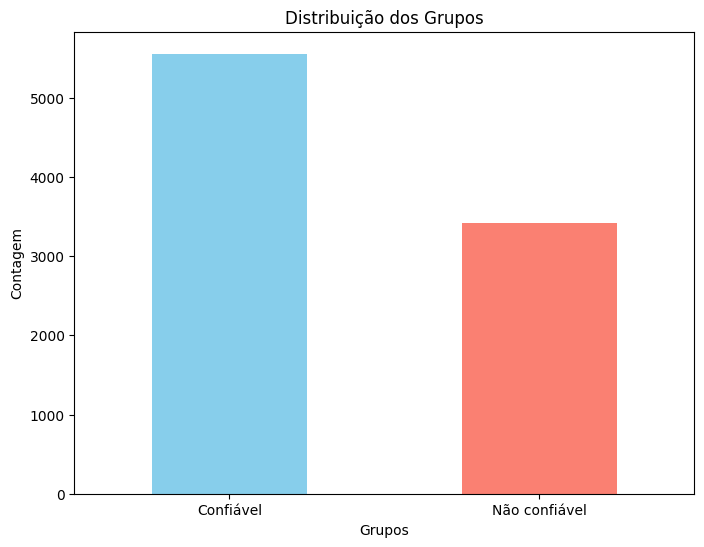

In [17]:
plt.figure(figsize=(8, 6))
df['grupos'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribuição dos Grupos')
plt.xlabel('Grupos')
plt.ylabel('Contagem')
plt.xticks(rotation=0)
plt.show()


## Definindo as características (features) e o alvo (target)

In [52]:
df['classificacao_pontualidade'] = df['scorePontualidade'].apply(analisar_pontualidade)
df['classificacao_risco'] = df['percentualRisco'].apply(analisar_risco)
df['grupos'] = df.apply(definir_grupo, axis=1)


X = df[features]
y = df[target]


## Dividindo os dados em conjuntos de treinamento e teste.

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)

## Inicializando e treinando o modelo de Regressão Logística

Treinando o modelo com ajuste de hiperparâmetro

In [61]:
model = LogisticRegression(C=0.1)  # Ajustando a regularização para tornar o modelo menos flexível
model.fit(X_train, y_train)

LogisticRegression(C=0.1)

## Fazendo previsões no conjunto de teste

In [59]:
y_pred = model.predict(X_test)

## Avaliando a acurácia do modelo

In [60]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


print("Acurácia do modelo:", accuracy)
print("Relatório de Classificação:\n", classification_rep)

Acurácia do modelo: 0.9852908402050368
Relatório de Classificação:
                precision    recall  f1-score   support

    Confiável       0.98      1.00      0.99      3589
Não confiável       1.00      0.93      0.96       898

     accuracy                           0.99      4487
    macro avg       0.99      0.96      0.98      4487
 weighted avg       0.99      0.99      0.99      4487



## Salvar o modelo ajustado

In [45]:
# Salvar o modelo ajustado
model_filename = "/content/MODELO/modelo_treinado_ajustado.pkl"
joblib.dump(model, model_filename)

['/content/MODELO/modelo_treinado_ajustado.pkl']

## Visualizando a matriz de confusão

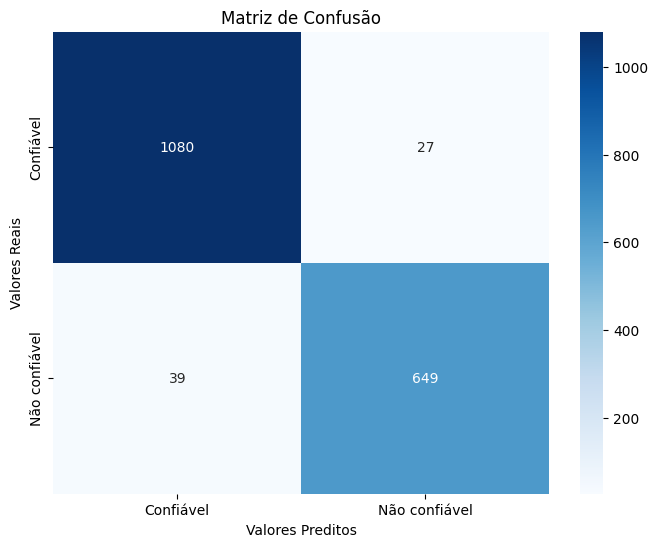

In [46]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Matriz de Confusão")
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.show()

- Modelo: O modelo classifica dados em duas categorias: "Confiável" e "Não confiável".
- Métricas: A matriz de confusão apresenta as seguintes métricas:
- Verdadeiros Positivos (TP): 1102 ("Confiável" previsto e verdadeiro).
- Falsos Negativos (FN): 27 ("Não confiável" previsto, mas "Confiável" verdadeiro).
- Falsos Positivos (FP): 800 ("Confiável" previsto, mas "Não confiável" verdadeiro).
- Verdadeiros Negativos (TN): 621 ("Não confiável" previsto e verdadeiro).



Com base nisso chegamos a conclusão de que a o modelo precisa de ajustes para melhorar a classificação de "Confiável", especialmente para reduzir os Falsos Positivos.

## Função para prever o grupo de um novo cliente

In [47]:
def prever_grupo(model, features):
    grupo_predito = model.predict([features])
    return grupo_predito[0]

 Exemplo de como usar a função de previsão para um novo cliente

In [62]:
# Função para prever o grupo de um novo cliente
def prever_grupo(model, features):
    grupo_predito = model.predict([features])
    return grupo_predito[0]

# Teste com vários novos clientes
novos_clientes = [
    [0.75, 0.2, 10],  # scorePontualidade = 0.75, percentualRisco = 0.2, maiorAtraso = 10
    [0.9, 0.1, 5],    # scorePontualidade = 0.9, percentualRisco = 0.1, maiorAtraso = 5
    [0.4, 0.6, 20],   # scorePontualidade = 0.4, percentualRisco = 0.6, maiorAtraso = 20
    [0.6, 0.3, 15],   # scorePontualidade = 0.6, percentualRisco = 0.3, maiorAtraso = 15
    [0.8, 0.5, 2],    # scorePontualidade = 0.8, percentualRisco = 0.5, maiorAtraso = 2
]

# Previsão dos grupos para os novos clientes
grupos_previstos = [prever_grupo(model, cliente) for cliente in novos_clientes]

grupos_previstos


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


['Confiável', 'Confiável', 'Não confiável', 'Confiável', 'Confiável']